In [1]:
from imageai.Detection.Custom import CustomObjectDetection, CustomVideoObjectDetection
import os,glob
import tensorflow
from tensorflow.keras import models,layers
from sklearn.linear_model import LogisticRegression
import numpy 
execution_path = os.getcwd()


# def train_detection_model():
#     from imageai.Detection.Custom import DetectionModelTrainer

#     trainer = DetectionModelTrainer()
#     trainer.setModelTypeAsYOLOv3()
#     trainer.setDataDirectory(data_directory="fire-dataset")
#     trainer.setTrainConfig(object_names_array=["fire"], batch_size=8, num_experiments=100,
#                            train_from_pretrained_model="pretrained-yolov3.h5")
#     # download 'pretrained-yolov3.h5' from the link below
#     # https://github.com/OlafenwaMoses/ImageAI/releases/download/essential-v4/pretrained-yolov3.h5
#     trainer.trainModel()


def detect_from_image():
#     print(execution_path)
    file_path = os.getcwd()+ "\\onfire"
    print(file_path)
    saved_path = os.getcwd() + "\det_dataset"
#     print(saved_path)
    detector = CustomObjectDetection()
    detector.setModelTypeAsYOLOv3()
    detector.setModelPath(detection_model_path=os.path.join(execution_path, "detection_model-ex-33--loss-4.97.h5"))
    detector.setJsonPath(configuration_json=os.path.join(execution_path, "detection_config.json"))
    detector.loadModel()
    f = open("onfire.txt", "a")
    for file in os.listdir(file_path):
        detections = detector.detectObjectsFromImage(input_image=os.path.join(file_path, file),
                                                 output_image_path=os.path.join(saved_path, file ),
                                                 minimum_percentage_probability=40)

        for detection in detections:
#             print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
            output = str(detection["name"]) + ";" + str(detection["percentage_probability"]) + ":" + str(detection["box_points"] )
            f.write(str(output))
        f.write("\n")
    f.close()

Using TensorFlow backend.


In [283]:
# detect_from_image()

C:\Users\george\Desktop\project\onfire


In [2]:
fire_exact_value = []
fire_percentage = []
fire_position = []
stove = []
cook = []
f = open("fire_data.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    if len(temp) == 1:
        fire_percentage.append(0)
        fire_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        fire_percentage.append(float(temp2[0]))
        fire_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if float(temp2[0])> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        fire_percentage.append(max_fire)
        fire_position.append(max_position)
    stove.append(1)
    cook.append(0)
    fire_exact_value.append(0)
    a=f.readline()
print(len(fire_percentage),len(fire_position),len(stove),len(cook),len(fire_exact_value))
f.close()

50 50 50 50 50


In [3]:
f = open("kitchen_fire.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    if len(temp) == 1:
        fire_percentage.append(0)
        fire_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        fire_percentage.append(float(temp2[0]))
        fire_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if float(temp2[0])> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        fire_percentage.append(max_fire)
        fire_position.append(max_position)
    stove.append(0)
    cook.append(1)
    fire_exact_value.append(0)
    a=f.readline()
print(len(fire_percentage),len(fire_position),len(stove),len(cook),len(fire_exact_value))
f.close()

111 111 111 111 111


In [4]:
f = open("onfire.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    if len(temp) == 1:
        fire_percentage.append(0)
        fire_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        fire_percentage.append(float(temp2[0]))
        fire_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if float(temp2[0])> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        fire_percentage.append(max_fire)
        fire_position.append(max_position)
    stove.append(0)
    cook.append(0)
    fire_exact_value.append(1)
    a=f.readline()
print(len(fire_percentage),len(fire_position),len(stove),len(cook),len(fire_exact_value))
f.close()

171 171 171 171 171


In [5]:
f = open("cook2.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    if len(temp) == 1:
        fire_percentage.append(0)
        fire_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        fire_percentage.append(float(temp2[0]))
        fire_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if float(temp2[0])> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        fire_percentage.append(max_fire)
        fire_position.append(max_position)
    stove.append(0)
    cook.append(1)
    fire_exact_value.append(0)
    a=f.readline()
print(len(fire_percentage),len(fire_position),len(stove),len(cook),len(fire_exact_value))
f.close()

221 221 221 221 221


In [6]:
f = open("kitchen_dis.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    if len(temp) == 1:
        fire_percentage.append(0)
        fire_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        fire_percentage.append(float(temp2[0]))
        fire_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if (float(temp2[0]))> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        fire_percentage.append(max_fire)
        fire_position.append(max_position)
    a=f.readline()
    stove.append(0)
    cook.append(1)
fire_exact_value  = fire_exact_value + [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(len(fire_percentage),len(fire_position),len(stove),len(cook),len(fire_exact_value))
f.close()

272 272 272 272 272


In [7]:
f = open("outside_fire_data.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")

    if len(temp) == 1:
        fire_percentage.append(0)
        fire_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        fire_percentage.append(float(temp2[0]))
        fire_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if(float(temp2[0]))> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        fire_percentage.append(max_fire)
        fire_position.append(max_position)
    a=f.readline()
    
    stove.append(0)
    cook.append(0)
fire_exact_value  = fire_exact_value + [0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(len(fire_percentage),len(fire_position),len(stove),len(cook),len(fire_exact_value))
f.close()

294 294 294 294 294


In [8]:

f = open("cook.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    if len(temp) == 1:
        fire_percentage.append(0)
        fire_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        fire_percentage.append(float(temp2[0]))
        fire_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if(float(temp2[0]))> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        fire_percentage.append(max_fire)
        fire_position.append(max_position)
    a=f.readline()
    
    stove.append(0)
    cook.append(1)
    fire_exact_value.append(0)
print(len(fire_percentage),len(fire_position),len(stove),len(cook),len(fire_exact_value))
f.close()

338 338 338 338 338


In [9]:
print(len(fire_percentage),len(fire_position),len(stove),len(cook),len(fire_exact_value))
for i in range(50):
    fire_percentage.append(0)
    fire_position.append([0,0,0,0])
    stove.append(0)
    cook.append(0)
    fire_exact_value.append(0)

338 338 338 338 338


In [10]:
logisticRegr = LogisticRegression(C=1e6)
train_data =[]
for i in range (len(fire_percentage)):
    train_data.append([fire_percentage[i],fire_position[i][0],fire_position[i][1],fire_position[i][2]*fire_position[i][3]/1000000,stove[i],cook[i]])
label = numpy.array(fire_exact_value)
logisticRegr.fit(train_data,label)
f_test_data = []
f_test_exact_value = []

C:\Users\george\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
test_exact_value = []
test_percentage = []
test_position = []
test_stove = []
test_cook = []
f = open("test_out.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    print(temp)
    if len(temp) == 1:
        test_percentage.append(0)
        test_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        test_percentage.append(float(temp2[0]))
        test_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if float(temp2[0])> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        test_percentage.append(max_fire)
        test_position.append(max_position)
    test_stove.append(0)
    test_cook.append(1)
    a=f.readline()

test_exact_value = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
f.close()

['', '56.97280168533325:[599, 0, 955, 959]\n']
['', '55.07134795188904:[410, 0, 1183, 880]\n']
['', '59.841495752334595:[437, 0, 1092, 899]\n']
['', '58.12838673591614:[390, 0, 1132, 881]\n']
['', '58.04235339164734:[408, 0, 1136, 900]\n']
['', '56.8525493144989:[550, 0, 1282, 819]\n']
['', '54.18182015419006:[681, 0, 1458, 806]\n']
['', '52.27944254875183:[721, 45, 1446, 806]\n']
['', '56.14844560623169:[749, 0, 1377, 882]\n']
['', '57.36317038536072:[656, 27, 1434, 841]\n']
['', '55.89362978935242:[710, 0, 1388, 809]\n']
['', '54.4009268283844:[556, 8, 1355, 853]\n']
['', '56.23892545700073:[571, 0, 1243, 901]\n']
['', '50.97094774246216:[491, 132, 1078, 889]\n']
['', '51.810723543167114:[383, 0, 899, 942]\n']
['', '64.86656665802002:[370, 181, 830, 926]\n']
['', '65.7761812210083:[431, 33, 699, 1024]\n']
['', '44.019293785095215:[453, 438, 744, 926]\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['', '41.41864478588104:[390, 575, 667, 954]\n']
['', '45.40465176105499:[381, 654, 677, 970]', 

In [26]:
acc = []
test_data=[]
for i in range (len(test_percentage)):
    test_data.append([test_percentage[i],test_position[i][0],test_position[i][1],test_position[i][2]*test_position[i][3]/1000000,test_stove[i],test_cook[i]])
print(logisticRegr.predict(test_data))
f_test_data = f_test_data + test_data
f_test_exact_value = f_test_exact_value + test_exact_value
accuracy = logisticRegr.score(test_data,test_exact_value)
print(accuracy)
acc.append(accuracy)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0]
0.8421052631578947


In [27]:
test_exact_value = []
test_percentage = []
test_position = []
test_stove = []
test_cook = []
f = open("test_out2.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    print(temp)
    if len(temp) == 1:
        test_percentage.append(0)
        test_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        test_percentage.append(float(temp2[0]))
        test_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if float(temp2[0])> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        test_percentage.append(max_fire)
        test_position.append(max_position)
    test_stove.append(0)
    test_cook.append(1)
    test_exact_value.append(0)
    a=f.readline()
f.close()

['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['', '49.31687414646149:[470, 592, 1470, 984]\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']


In [28]:
test_data=[]
for i in range (len(test_percentage)):
    test_data.append([test_percentage[i],test_position[i][0],test_position[i][1],test_position[i][2]*test_position[i][3]/1000000,test_stove[i],test_cook[i]])
print(logisticRegr.predict(test_data))
accuracy = logisticRegr.score(test_data,test_exact_value)
f_test_data = f_test_data + test_data
f_test_exact_value = f_test_exact_value + test_exact_value
print(accuracy)
acc.append(accuracy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1.0


In [29]:
test_exact_value = []
test_percentage = []
test_position = []
test_stove = []
test_cook = []
f = open("test3.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    print(temp)
    if len(temp) == 1:
        test_percentage.append(0)
        test_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        test_percentage.append(float(temp2[0]))
        test_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if float(temp2[0])> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        test_percentage.append(max_fire)
        test_position.append(max_position)
    test_stove.append(0)
    test_cook.append(1)
    test_exact_value.append(0)
    a=f.readline()
f.close()

['', '72.62585759162903:[1354, 543, 1489, 802]\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['', '48.58544170856476:[1258, 0, 1811, 461]', '52.231138944625854:[1377, 363, 1903, 1042]\n']
['', '50.38904547691345:[1158, 0, 1889, 422]\n']
['', '58.66878628730774:[1387, 143, 1751, 888]\n']
['', '55.45930862426758:[1288, 53, 1753, 857]\n']
['', '58.469563722610474:[1279, 60, 1766, 830]\n']
['\n']
['\n']
['\n']
['', '49.22434389591217:[1336, 47, 1701, 863]\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['\n']
['', '52.20871567726135:[1346, 6, 2004, 729]', '57.755619287490845:[1425, 712, 1940, 1070]\n']
['', '44.21147108078003:[1383, 0, 2003, 762]\n']
['', '56.53297305107117:[1477, 760, 1951, 1093]\n']
['', '53.26042175292969:[1517, 306, 1908, 951]\n']
['', '53.947651386260986:[1491, 39, 1654, 227]\n']
['', '72.17846512794495:[1799, 381, 1914, 589]\n']
['\n']
['', '52.03119516372681:[1396, 785, 1949, 1090]\n']
['', '48.39109182357788:[1376, 775, 1929, 1079]\

In [30]:
test_data=[]
for i in range (len(test_percentage)):
    test_data.append([test_percentage[i],test_position[i][0],test_position[i][1],test_position[i][2]*test_position[i][3]/1000000,test_stove[i],test_cook[i]])
logisticRegr.predict(test_data)
f_test_data = f_test_data + test_data
f_test_exact_value = f_test_exact_value + test_exact_value
accuracy = logisticRegr.score(test_data,test_exact_value)
print(accuracy)
acc.append(accuracy)

0.92


In [31]:
test_exact_value = []
test_percentage = []
test_position = []
test_stove = []
test_cook = []
f = open("test4.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    print(temp)
    if len(temp) == 1:
        test_percentage.append(0)
        test_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        test_percentage.append(float(temp2[0]))
        test_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if float(temp2[0])> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        test_percentage.append(max_fire)
        test_position.append(max_position)
    test_stove.append(0)
    test_cook.append(0)
    test_exact_value.append(1)
    a=f.readline()
f.close()
test_data=[]
for i in range (len(test_percentage)):
    test_data.append([test_percentage[i],test_position[i][0],test_position[i][1],test_position[i][2]*test_position[i][3]/1000000,test_stove[i],test_cook[i]])
logisticRegr.predict(test_data)
accuracy = logisticRegr.score(test_data,test_exact_value)
print(accuracy)
f_test_data = f_test_data + test_data
f_test_exact_value = f_test_exact_value + test_exact_value
acc.append(accuracy)

['', '62.62362003326416:[3, 41, 77, 92]\n']
['', '64.77220058441162:[66, 104, 146, 166]\n']
['', '41.01007580757141:[148, 114, 214, 154]\n']
['', '62.767744064331055:[135, 82, 192, 144]\n']
['', '67.0314073562622:[202, 14, 279, 65]\n']
['', '62.94422745704651:[40, 48, 109, 135]\n']
['', '63.0718469619751:[100, 69, 190, 132]\n']
['', '56.084030866622925:[100, 31, 177, 107]\n']
['', '40.82795977592468:[106, 97, 170, 134]\n']
['', '54.877978563308716:[106, 72, 192, 159]', '47.35522270202637:[213, 121, 257, 152]\n']
['', '50.31890869140625:[109, 53, 145, 109]\n']
['', '51.985520124435425:[77, 64, 156, 117]\n']
['', '51.756566762924194:[80, 60, 161, 109]\n']
['', '73.14397096633911:[21, 34, 115, 110]', '74.52661991119385:[169, 96, 202, 120]', '56.62384629249573:[76, 121, 98, 139]', '66.73875451087952:[13, 131, 58, 148]\n']
['', '55.7153582572937:[81, 88, 171, 179]\n']
['', '40.27019441127777:[93, 39, 142, 118]\n']
['', '63.065457344055176:[124, 83, 193, 132]\n']
['', '65.05854725837708:[87,

In [32]:
test_exact_value = []
test_percentage = []
test_position = []
test_stove = []
test_cook = []
f = open("test5.txt")
a = f.readline()
while a != '':
    temp = a.split("fire;")
    if len(temp) == 1:
        test_percentage.append(0)
        test_position.append([0,0,0,0])
    if len(temp) == 2:
        temp2 = temp[1].split(":")
        temp3 = temp2[1].replace("[", "")
        temp3 = temp3.replace("]", "")
        temp3 = temp3.split(",")
        test_percentage.append(float(temp2[0]))
        test_position.append([int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])])
    if len(temp) > 2:
        start = 1
        temp_per = []
        temp_position = []
        max_fire = 0
        max_position = []
        while start < len(temp):
            temp2 = temp[start].split(":")
            temp3 = temp2[1].replace("[", "")
            temp3 = temp3.replace("]", "")
            temp3 = temp3.split(",")
            if float(temp2[0])> max_fire:
                max_fire = float(temp2[0])
                max_position = [int(temp3[0]),int(temp3[1]),int(temp3[2]),int(temp3[3])]
            start = start + 1
        test_percentage.append(max_fire)
        test_position.append(max_position)
    test_stove.append(1)
    test_cook.append(0)
    test_exact_value.append(0)
    a=f.readline()
f.close()
test_data=[]
for i in range (len(test_percentage)):
    test_data.append([test_percentage[i],test_position[i][0],test_position[i][1],test_position[i][2]*test_position[i][3]/1000000,test_stove[i],test_cook[i]])
logisticRegr.predict(test_data)
accuracy = logisticRegr.score(test_data,test_exact_value)
print(accuracy)
f_test_data = f_test_data + test_data
f_test_exact_value = f_test_exact_value + test_exact_value


1.0


In [33]:
test_data = []
test_exact_value = []
for i in range ((50)):
    test_data.append([0,0,0,0,0,0])
    test_exact_value.append(0)
logisticRegr.predict(test_data)
accuracy = logisticRegr.score(test_data,test_exact_value)
print(accuracy)
f_test_data = f_test_data + test_data
f_test_exact_value = f_test_exact_value + test_exact_value
acc.append(accuracy)

1.0


[0.8421052631578947, 1.0, 0.92, 0.9666666666666667, 1.0]


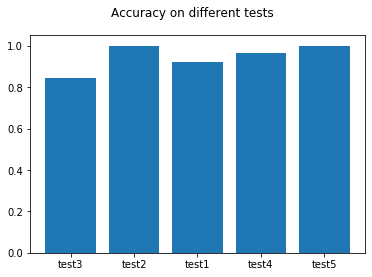

In [34]:
import matplotlib.pyplot as plt
print(acc)
names = ['test3', 'test2', 'test1','test4','test5']
plt.bar(names, acc)
plt.suptitle('Accuracy on different tests')
plt.show()